In [51]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [52]:
import pandas as pd
from neuralprophet import NeuralProphet

In [53]:
from prophet import Prophet
import pandas as pd

In [61]:
from prophet import Prophet
import pandas as pd
s=pd.read_csv(r"C:\Users\prernagupta\Desktop\pink.csv")
s

,trend_index,trend_name,trend,base,model_created_at,season,ds,y,nsi,fsi_yhat_lower,fsi_yhat,fsi_yhat_upper,fsi_pivot_points,trending_index,newness_index,markdown_index,fashion_leaders_index,oos_index,catwalk_impact
0,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,A/W 2016,02/01/2017,0.043143,0.054272,0.040342,0.044280,0.048135,"['2018-10-08', '2021-09-20']",0.960876,-0.144778,0.603863,0.449516,0.000753,0.0
1,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,A/W 2016,09/01/2017,0.041593,0.047092,0.039946,0.043907,0.047858,"['2018-10-08', '2021-09-20']",0.950871,-0.079071,0.631808,0.457991,0.005234,0.0
2,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,A/W 2016,16/01/2017,0.040007,0.041367,0.039768,0.043586,0.047238,"['2018-10-08', '2021-09-20']",0.942307,-0.013394,0.658857,0.466095,0.008925,0.0
3,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,A/W 2016,23/01/2017,0.037816,0.036950,0.039289,0.043330,0.047160,"['2018-10-08', '2021-09-20']",0.935183,0.052253,0.685009,0.473829,0.011917,0.0
4,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,A/W 2016,30/01/2017,0.038699,0.033695,0.039261,0.043128,0.047219,"['2018-10-08', '2021-09-20']",0.929499,0.117871,0.710264,0.481191,0.014303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,S/S 2024,12/02/2024,NaN,NaN,0.033765,0.037876,0.042184,"['2018-10-08', '2021-09-20']",NaN,NaN,NaN,NaN,NaN,NaN
372,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,S/S 2024,19/02/2024,NaN,NaN,0.033361,0.037439,0.041940,"['2018-10-08', '2021-09-20']",NaN,NaN,NaN,NaN,NaN,NaN
373,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,S/S 2024,26/02/2024,NaN,NaN,0.032551,0.036891,0.041231,"['2018-10-08', '2021-09-20']",NaN,NaN,NaN,NaN,NaN,NaN
374,722,pink_medium_apparel_all_w,Pink Medium Apparel Global,Apparel,Mar-22,S/S 2024,04/03/2024,NaN,NaN,0.031715,0.036202,0.040631,"['2018-10-08', '2021-09-20']",NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
s=s.iloc[:, [6, 7]]
s
s['ds']= pd.to_datetime(s['ds'])
s

WARNING - (py.warnings._showwarnmsg) - <ipython-input-62-60943957d9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])



,ds,y
0,2017-02-01,0.043143
1,2017-09-01,0.041593
2,2017-01-16,0.040007
3,2017-01-23,0.037816
4,2017-01-30,0.038699
...,...,...
371,2024-12-02,NaN
372,2024-02-19,NaN
373,2024-02-26,NaN
374,2024-04-03,NaN


In [63]:
s=s.dropna()

In [77]:
m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=5,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True, epochs=5000)
metrics = m.fit(s, freq="7D")
future = m.make_future_dataframe(s, periods=75, n_historic_predictions=len(s))
forecast = m.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[5000/5000]: 100%|█| 5000/5000 [05:11<00:00, 16.05it/s, SmoothL1Loss=0.0103, MAE=0.00328, RMSE=0.00426, RegLoss=0]


In [78]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.210511,0.015847,0.019339,0.0
1,0.068718,0.009145,0.011223,0.0
2,0.037647,0.006826,0.008282,0.0
3,0.025804,0.005584,0.006892,0.0
4,0.021389,0.005017,0.006266,0.0
...,...,...,...,...
4995,0.010268,0.003276,0.004232,0.0
4996,0.010268,0.003276,0.004216,0.0
4997,0.010268,0.003276,0.004259,0.0
4998,0.010268,0.003276,0.004287,0.0


Text(0.5, 1.0, 'medium-pink')

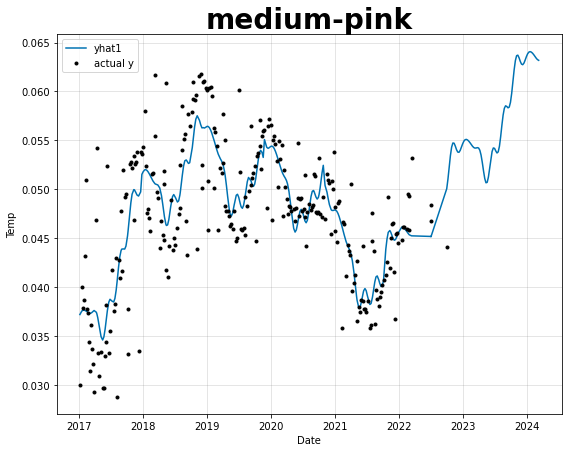

In [79]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("medium-pink", fontsize=28, fontweight="bold")

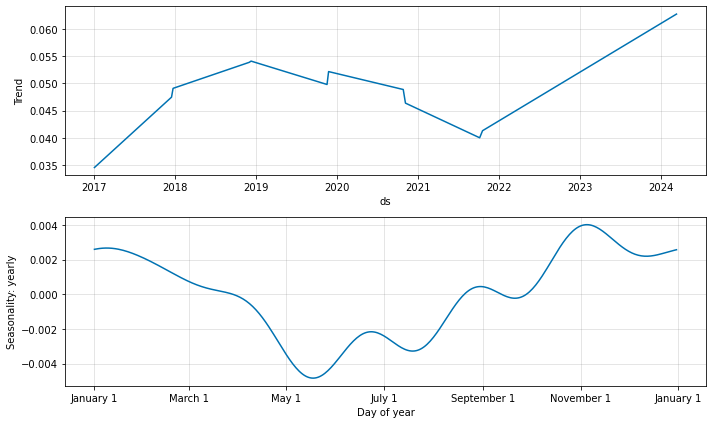

In [80]:
fig_comp = m.plot_components(forecast)

In [81]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
import numpy as np

In [82]:
import numpy as np
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2017-01-05,0.030001,0.037184,0.007183,0.034532,0.002652
1,2017-01-16,0.040007,0.037544,-0.002464,0.034942,0.002602
2,2017-01-23,0.037816,0.037627,-0.000189,0.035203,0.002424
3,2017-01-30,0.038699,0.037630,-0.001069,0.035464,0.002166
4,2017-02-01,0.043143,0.037621,-0.005522,0.035538,0.002082
...,...,...,...,...,...,...
342,2024-02-10,NaN,0.063756,NaN,0.062054,0.001702
343,2024-02-17,NaN,0.063578,NaN,0.062226,0.001352
344,2024-02-24,NaN,0.063401,NaN,0.062398,0.001003
345,2024-03-02,NaN,0.063258,NaN,0.062570,0.000689


In [83]:
forecast1=forecast.dropna()
MAPE(forecast1['y'], forecast1['yhat1'])

7.171641947921212

In [33]:
#Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days.
#On this 8 year time series, this corresponds to 11 total forecasts.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


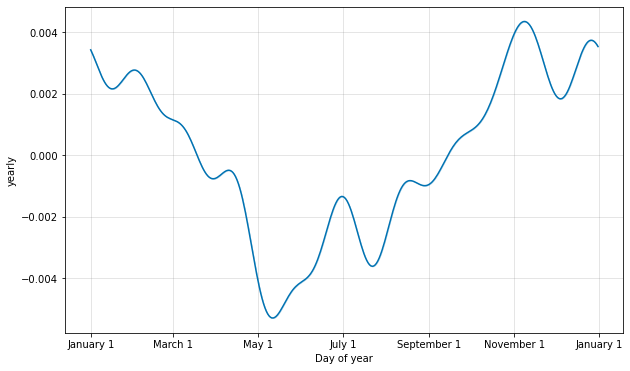

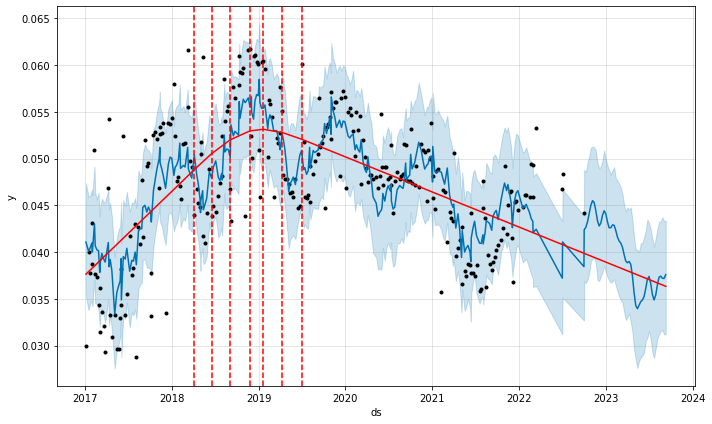

In [64]:
from prophet import Prophet
import pandas as pd
df=s
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)



from prophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_range=1.0)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=50, freq='W')

#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)




In [70]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2019-04-15 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [71]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,33 days,0.000026,0.005114,0.004364,0.093255,0.074105,0.088108,0.666667
1,35 days,0.000027,0.005191,0.004462,0.095505,0.074105,0.090180,0.666667
2,37 days,0.000027,0.005159,0.004375,0.093676,0.074105,0.088420,0.666667
3,39 days,0.000027,0.005156,0.004368,0.093475,0.074105,0.088280,0.666667
4,40 days,0.000027,0.005174,0.004408,0.094546,0.074105,0.089293,0.666667


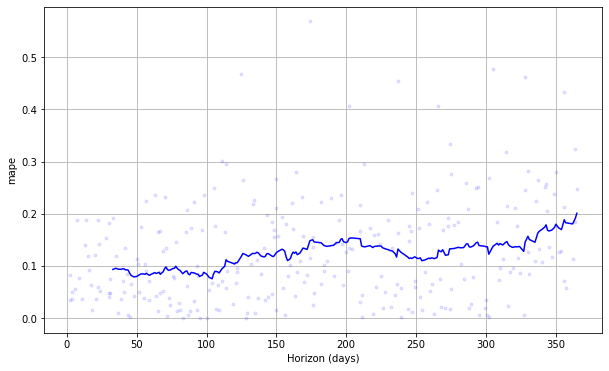

In [72]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [73]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1400 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-04-04 00:00:00 and 2021-10-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

In [74]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,0.000007,0.002699,0.002507,0.061025,0.056522,0.059178,1.000000
1,31 days,0.000009,0.002979,0.002816,0.066402,0.059042,0.065056,1.000000
2,33 days,0.000015,0.003898,0.003498,0.085763,0.062615,0.082235,0.857143
3,40 days,0.000013,0.003633,0.003243,0.079075,0.062615,0.076141,0.857143
4,43 days,0.000014,0.003704,0.003334,0.082228,0.071816,0.079074,0.857143


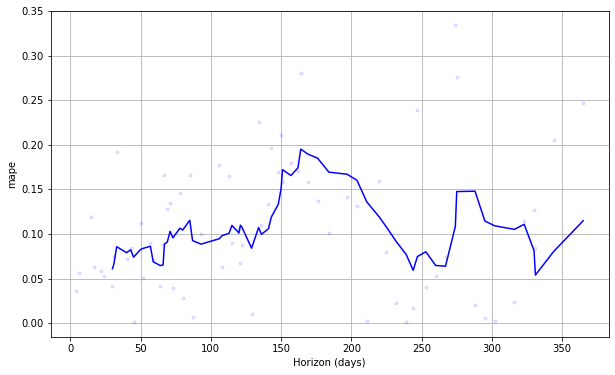

In [76]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [65]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,0.000042,0.006448,0.006410,0.066092,0.067584,0.068371,0.0
1,36 days,0.000045,0.006731,0.006729,0.068324,0.067584,0.070743,0.0
2,43 days,0.000048,0.006950,0.006932,0.069126,0.067584,0.071608,0.0
3,50 days,0.000054,0.007382,0.007344,0.071783,0.069809,0.074472,0.0
4,57 days,0.000054,0.007381,0.007342,0.070819,0.069809,0.073442,0.0


In [39]:
def eval_neural(df):
    """
    Perform cross validation on our model.
    IMPORTANT: this is correct eval method according to the docs, but differs from Prophet 
               so I built a custom function.
    """

    # setup k fold CV
    METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']

    folds = NeuralProphet().crossvalidation_split_df(df, freq="7D", k=5, fold_pct=0.10, fold_overlap_pct=0.5)

    # return dfs
    metrics_train = pd.DataFrame(columns=METRICS)
    metrics_test = pd.DataFrame(columns=METRICS)

    # CV
    for df_train, df_test in folds:
        m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=5,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True)
        train = m.fit(df=df_train, freq="7D", 
        epochs=1000,
        local_modeling=False,
        progress_bar=True,
        plot_live_loss=False,
        progress_print=True,
        minimal=False)
        test = m.test(df=df_test)
        metrics_train = metrics_train.append(train[METRICS].iloc[-1])
        metrics_test = metrics_test.append(test[METRICS].iloc[-1])
    return ( metrics_test, metrics_train)


In [46]:
df=s

In [47]:
eval_neural(s)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[1000/1000]: 100%|██| 1000/1000 [00:23<00:00, 42.78it/s, SmoothL1Loss=0.00988, MAE=0.002, RMSE=0.00263, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.830  0.025  0.028
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.830  0.025  0.028
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch[1000/1000]: 100%|█| 1000/1000 [00:22<00:00, 44.83it/s, SmoothL1Loss=0.00851, MAE=0.00199, RMSE=0.00263, RegLoss=0
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.695  0.024  0.026
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.695  0.024  0.026
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
Epoch

(   SmoothL1Loss       MAE      RMSE
 0      0.829996  0.024676  0.027811
 0      0.694595  0.024155  0.026041
 0      0.636810  0.029981  0.031861
 0      0.030085  0.010576  0.012062
 0      0.027990  0.012425  0.017178,
      SmoothL1Loss       MAE      RMSE
 999      0.009883  0.002005  0.002634
 999      0.008511  0.001993  0.002628
 999      0.007471  0.002511  0.003223
 999      0.002210  0.002455  0.003170
 999      0.001329  0.002808  0.003661)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
sqrt(mean_squared_error(forecast1['y'], forecast1['yhat1']) )

0.004429854086492451